In [1]:
from quantileRegression import quantileRegression
import numpy as np

Welcome to ROOTaaS 6.06/02


In [2]:
# Variable you want to correct
# ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi'] # , 'PhoIso03', 'ChIso03', 'ChIso03worst']
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", 'CovarianceIetaIphi'] # , 'PhoIso03', 'ChIso03', 'ChIso03worst']


# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list

In [3]:
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]
print "Number of quantiles ", len(quantiles)

Number of quantiles  9


In [4]:
# Initialize the quantile regression object for mc
qr_mc = quantileRegression("mc")

In [5]:
# This is what you want to correct
print "Load the mc dataframe"
startEvtmc = 2000001 
stopEvtmc  = 3000000
qr_mc.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v2_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYToEE_powheg_13TeV_EBHighR9", "DYToEE_powheg_13TeV_EBLowR9", "DYToEE_powheg_13TeV_EEHighR9", "DYToEE_powheg_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)

Load the mc dataframe
NT branches: 
['rho', 'nvtx', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'leadScEnergy', 'leadCovarianceIetaIphi', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadScPreshowerEnergy', 'leadPhoIDMVA', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR', 'subleadScEnergy', 'subleadCovarianceIetaIphi', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'leadScPreshowerEnergy', 'subLeadPhoIDMVA']
['cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13T

In [6]:
#print "Get the corrected data-mc values"
qr_mc.correctAllY(X, ylist, quantiles )

Loading corrected targets from :  correctedTargets.h5


In [7]:
dfmc = qr_mc.getDF()
#print dfmc

In [8]:
# now get the data
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = -1
print "Load the data dataframe"
qr_data.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v2_ichep/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata)

Load the data dataframe
NT branches: 
['rho', 'nvtx', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'leadScEnergy', 'leadCovarianceIetaIphi', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadScPreshowerEnergy', 'leadPhoIDMVA', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR', 'subleadScEnergy', 'subleadCovarianceIetaIphi', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'leadScPreshowerEnergy', 'subLeadPhoIDMVA']
['cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  c

In [9]:
dfdata = qr_data.getDF()
dfdata = dfdata[['index', 'rho', 'nvtx', 'Pt', 'ScEta', 'Phi', 'R9',      'S4',      'SigmaIeIe',      'EtaWidth',      'PhiWidth',      'CovarianceIphiIphi',      'CovarianceIetaIphi']] # ,      'PhoIso03',      'ChIso03',      'ChIso03worst']]
# print dfdata

In [10]:
dfmcNOcorr = dfmc[['index', 'rho', 'nvtx', 'Pt', 'ScEta', 'Phi', 'R9',      'S4',      'SigmaIeIe',      'EtaWidth',      'PhiWidth',      'CovarianceIphiIphi',      'CovarianceIetaIphi']] #,      'PhoIso03',      'ChIso03',      'ChIso03worst']]
dfmccorr   = dfmc[['index', 'rho', 'nvtx', 'Pt', 'ScEta', 'Phi', 'R9_corr', 'S4_corr', 'SigmaIeIe_corr', 'EtaWidth_corr', 'PhiWidth_corr', 'CovarianceIphiIphi_corr', 'CovarianceIetaIphi_corr' ]]# , 'PhoIso03_corr', 'ChIso03_corr', 'ChIso03worst_corr']]

# It needs the same column names to compute the difference between the correlation matrices
dfmccorr.rename(columns={'R9_corr':'R9', 'S4_corr':'S4', 'SigmaIeIe_corr':'SigmaIeIe', 'EtaWidth_corr':'EtaWidth', 'PhiWidth_corr':'PhiWidth', 'CovarianceIphiIphi_corr':'CovarianceIphiIphi', 'CovarianceIetaIphi_corr':'CovarianceIetaIphi', 'PhoIso03_corr':'PhoIso03', 'ChIso03_corr':'ChIso03', 'ChIso03worst_corr':'ChIso03worst'}, inplace=True)
# print dfmccorr

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [11]:
#print dfdata
#print dfmcNOcorr
#print dfmccorr

In [12]:
correldata     = dfdata.corr()
correlmcNOcorr = dfmcNOcorr.corr()
correlmccorr   = dfmccorr.corr()

In [13]:
 # Some basic plots
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

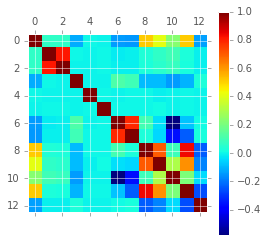

In [14]:
#print correldata
# 'index', 'rho', 'nvtx', 'Pt', 'ScEta', 'Phi', 'R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth', 'CovarianceIphiIphi', 'SigmaRR'
plt.matshow(correldata)
plt.colorbar()

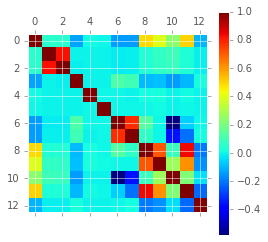

In [15]:
#print correlmcNOcorr
plt.matshow(correlmcNOcorr)
plt.colorbar()

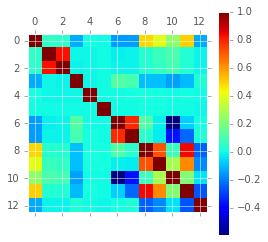

In [16]:
#print correlmccorr
plt.matshow(correlmccorr)
plt.colorbar()

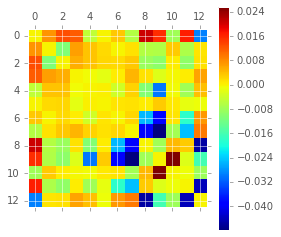

In [17]:
diffCorrelMcNOCorrData = correldata - correlmcNOcorr
#print diffCorrelMcNOCorrData
plt.matshow(diffCorrelMcNOCorrData)
plt.colorbar()

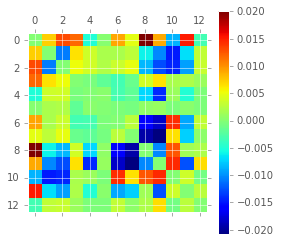

In [18]:
diffCorrelMcCorrData = correldata - correlmccorr
#print diffCorrelMcCorrData
plt.matshow(diffCorrelMcCorrData)
plt.colorbar()

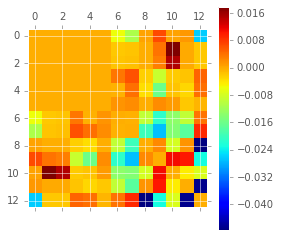

In [19]:
test = diffCorrelMcNOCorrData - diffCorrelMcCorrData
plt.matshow(test)
plt.colorbar()

The effect of the corrections (...as expected) has a very small impact.
Need to go more granular

Remember there is no data/mc reweighting done ! ...maybe not needed because we train on pt/eta/phi/rho


This is global. I need more local checks in pt/eta/phi/rho:
- [corr(mccorr)-corr(data)] vs. pt/eta/phi/rho
    With the dataframe mccorr created above and the one on data, 
    select within the dataframe a range in pt/eta/phi/rho and compute 
    [corr(mccorr)-corr(data)] 